In [155]:
print("Recent contributors and numbers to the plastic pullution in our waterways.")

#Ingest, analyze and display multiple pieces of data.

import pandas as pd # pandas is being used for data cleansing and normalization
import numpy as np # is being used for mathematical operations
import matplotlib.pyplot as plt # is used for data visualization
import seaborn as sns # the data visualization library used in conjuction with matplotlib
import plotly.express as px # for plotting the data on world mapfrom 
from mpl_toolkits.basemap import Basemap
import math
#import datetime # for the count down until the project is to be turned in


Recent contributors and numbers to the plastic pullution in our waterways.


In [156]:
#Import data from csv file downloaded from ourworldindata.org/plastic-pullution
global_share = pd.read_csv(r"assets\global_mismanaged_plastic_waste.csv")
rivers = pd.read_csv(r"assets\plastics_top_rivers.csv")
ocean_totals = pd.read_csv(r"assets\ocean_waste_ton.csv")
global_waste = pd.read_csv(r"assets\global_waste_2_ocean.csv")

In [ ]:
#Cleanse imported csv file
#Answer question: Which countries produce the most plastic waste? and Which countries emit most plastic waste to the oceans? in a stacked bar chart.
global_share.drop(["Year","Code"], axis=1, inplace=True)
global_share.rename(columns = {"Share of global mismanaged plastic waste": "Mismanaged plastic waste"}, inplace=True)
global_share
#print(global_share.head(10))

#print('―' * 100)  # U+2015, Horizontal Bar

global_waste.drop(["Year","Code"], axis=1, inplace=True)
global_waste.rename(columns = {"Global waste to ocean percentage": "Waste to ocean"}, inplace=True)
#print(global_waste.head(10))

#top_10_mismanaged = global_share.sort_values(by=["Mismanaged plastic waste"], ascending=False).head(20)
#top_10_waste_ocean = global_waste.sort_values(by=["Waste to ocean"], ascending=False).head(20)
#print(top_10_mismanaged.head(10))
#print('―' * 100)  # U+2015, Horizontal Bar
#print(top_10_waste_ocean.head(10))

combined = pd.merge(global_share, global_waste, how="outer", on=["Entity"])
#print(combined.head(20))

combined_values = pd.DataFrame(combined, columns=["Entity", "Mismanaged plastic waste", "Waste to ocean"])
combined_sorted = data.sort_values(by="Mismanaged plastic waste", ascending=False)
combined_sorted.set_index("Entity", inplace=True)
ranking = combined_sorted.head(15)

print(combined_sorted.head(15))

first_bar = ranking["Mismanaged plastic waste"]
first_bar_label = "Mismanaged waste"
first_bar_color = '#32628d'
second_bar = ranking["Waste to ocean"]
second_bar_label = "Emitted to ocean"
second_bar_color = '#cde01d'
labels = ranking.index
width = 0.4  # the width of the bars
plot_title = "Top contributors to ocean waste"
title_size = 18
filename = 'barh-plot'

fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)
plt.gca().invert_yaxis()
#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])
plt.subplots_adjust(left=0.35, top=0.9)

ax.set_yticklabels(labels)
ax.legend()
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()




#country = combined["Entity"]
#waste = combined["Mismanaged plastic waste"]
#ocean = combined["Waste to ocean"]
#dataset = combined.groupby("Entity")









In [ ]:
#Cleanse imported csv file
#Answer question: Which rivers emit most plastic to oceans?
rivers.drop(['Year','Code'], axis=1, inplace=True)
rivers.rename(columns = {'Global plastics emitted to ocean in percentage': 'River Percentage'}, inplace=True)
rivers

top_10_rivers = rivers.sort_values(by=['River Percentage'], ascending=False).head(10)
#top_10_rivers.head(10)

print(top_10_rivers)

X=top_10_rivers['River Percentage']
Y=top_10_rivers['Entity']

plt.figure(figsize=(12,12))
plt.barh(Y,X, color='g')
plt.gca().invert_yaxis()
plt.title('Which rivers emit the most plastic waste to the oceans?')
plt.ylabel('River')
plt.xlabel('Percentage')
plt.show()





                 Entity  Total Mass (ton)
0  Global ocean (total)            268950
1          Indian Ocean             59130
2     Mediterranean Sea             23150
3        North Atlantic             56470
4         North Pacific             96400
5        South Atlantic             12780
6         South Pacific             21020
The total global amount of plastic in the oceans is 268,950 tons!


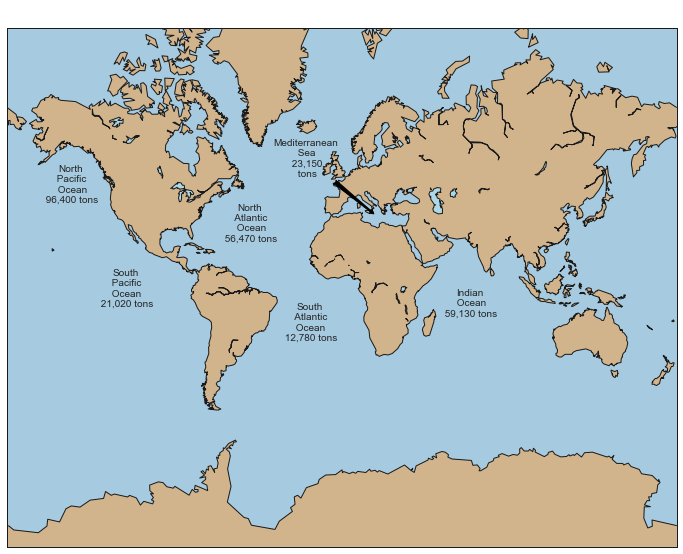

In [157]:
#Cleanse imported csv file
#Answer question: Which oceans have the most plastic waste?
ocean_totals.drop(['Code', 'Year'], axis=1, inplace=True)
ocean_totals
ocean_totals.rename(columns = {'All sizes (total mass) ton': 'Total Mass (ton)'}, inplace=True)
ocean_totals
#ocean_totals.dtypes
print(ocean_totals)
print("\033[91m" + "The total global amount of plastic in the oceans is 268,950 tons!" + "\033[0m")


fig = plt.figure(num=None, figsize=(12, 10) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawmapboundary(fill_color='#A6CAE0')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')



plt.annotate('Indian\n Ocean\n 59,130 tons', m(68.75,-8.35), fontsize=10, ha='center', va='center')
plt.annotate('Mediterranean\n Sea\n 23,150\n tons', m(17.94,36.09), xytext=m(-19.56,56.87), fontsize=10, ha='center', va='center', arrowprops=dict(arrowstyle="fancy", color='black'))
plt.annotate('North\n Atlantic\n Ocean\n 56,470 tons', m(-49.57,32.57), fontsize=10, ha='center', va='center')
plt.annotate('South\n Atlantic\n Ocean\n 12,780 tons', m(-17.56,-18.53), fontsize=10, ha='center', va='center')
plt.annotate('North\n Pacific\n Ocean\n 96,400 tons', m(-145.88,48.32), fontsize=10, ha='center', va='center')
plt.annotate('South\n Pacific\n Ocean\n 21,020 tons', m(-116.53,-0.53), fontsize=10, ha='center', va='center')
plt.title('Which ocean has the most plastic waste?', fontsize=20, color='white')
plt.show()

In [148]:
#Answer question: Where does all the plastic accumulate in the ocean?